# Investment Planning for Electricity Generation

*Daniel Cortild, Anastasia Bouwsma, Esteban Castillo Mondragón*

## Part 1

In [1]:
from scipy.optimize import linprog
import numpy as np
import pandas as pd
import cvxpy as cp
import time
import gurobipy
from tqdm import tqdm
import function_plot as pl
print(cp.installed_solvers())

n=4
k=3    

['CLARABEL', 'ECOS', 'ECOS_BB', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']


### Expected Value Problem

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Objective value: 394.6666666666667
Capacity of each technology: [2.83333333 3.         2.16666667 6.        ]
Investment costs for phase 1: 120.0
Production costs for phase 2: 274.6666666666667


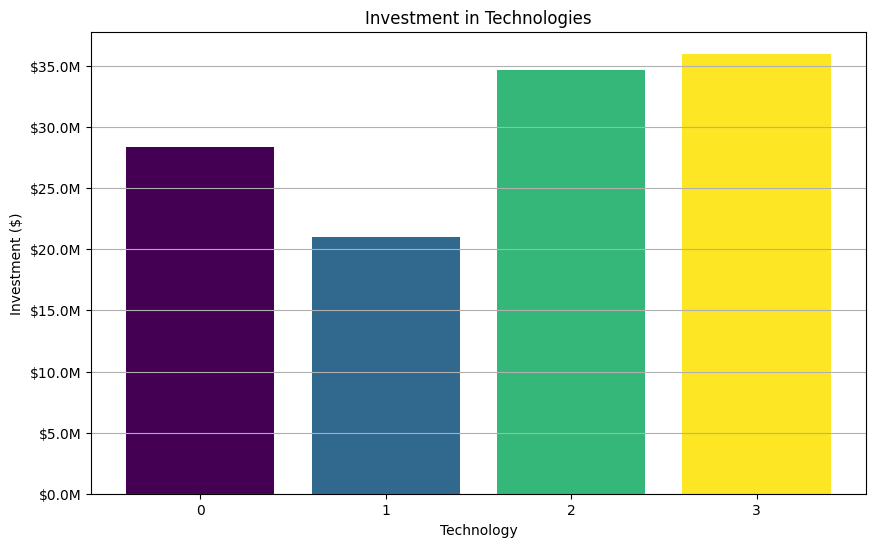

In [2]:

c = [10.,7.,16.,6.]  #costs for instalation
c=c 
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*n+[0]*(len(c)-n)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:n]+[0]*(len(c)-n)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(k-i)+(([0]*i+[1]+[0]*(k-i))*k) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(n+n*i)+[-1]*n+[0]*(len(c)-8-n*i) for i in range(k)]
bub = bub + [-5,-3,-2]

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res= problem.solve(solver = cp.GUROBI)
avres=list(x.value[0:n])
precost=sum([c[i]*x.value[i] for i in range(n)])
prodcost=sum([c[i]*x.value[i] for i in np.arange(n,len(x.value))])
pl.print_solution(x,c,n)
pl.plot_result(x,c,n)

### Expected Value Solution

In [3]:
#function to test the average sollution in practice
#c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= [v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
#Aub = [[-1]*4+[0]*(len(c)-4)]
#bub=[-7-4-3]
#budget
#Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
#bub.append(120)

#phase 2 constraints
#capacity
Aub =[[0]*(12*j)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-12-12*j ) for j in range(len(probs)) for i in range(n) ]
bub =  avres*len(probs)

#power requirement
Aub = Aub + [[0]*(4*i+12*j)+[-1]*4+[0]*(len(c)-4-4*i-12*j) for j in range(len(probs)) for i in range(k)]

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res3= problem.solve(solver = cp.GUROBI)
print(res3+precost)

399.5926666666666


### Recourse Problem

[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
328
[0, 0, 0, 

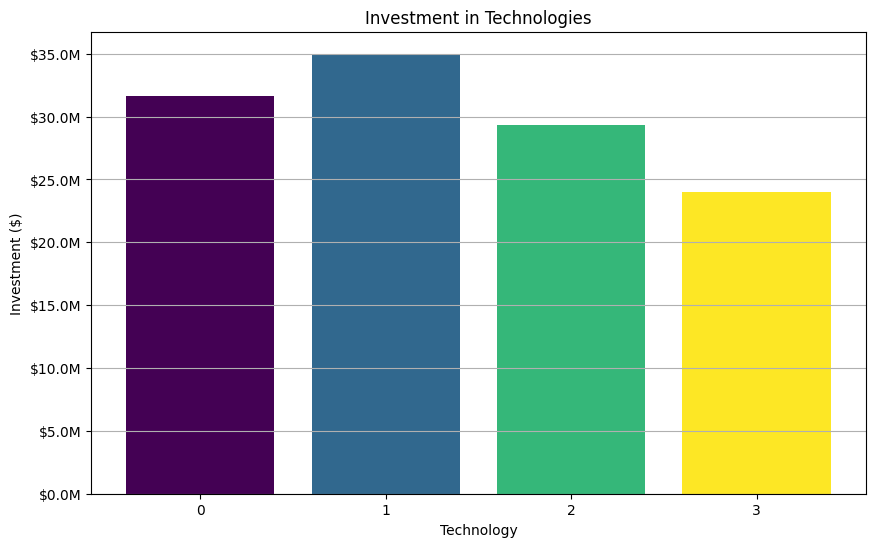

In [4]:
c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= c+[v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*(i )+[-1]+[0]*(3-i+12*k)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-16-12*k ) for k in range(len(probs)) for i in range(4) ]
print(Aub[-1])
print(len(c))
bub = bub+ [0]*4*len(probs)

#power requirement
Aub = Aub + [[0]*(4+4*i+12*k)+[-1]*4+[0]*(len(c)-8-4*i-12*k) for k in range(len(probs)) for i in range(3)]
print(Aub[-1])

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res2= problem.solve(solver = cp.GUROBI)
pl.print_solution(x,c,n)
pl.plot_result(x,c,n)

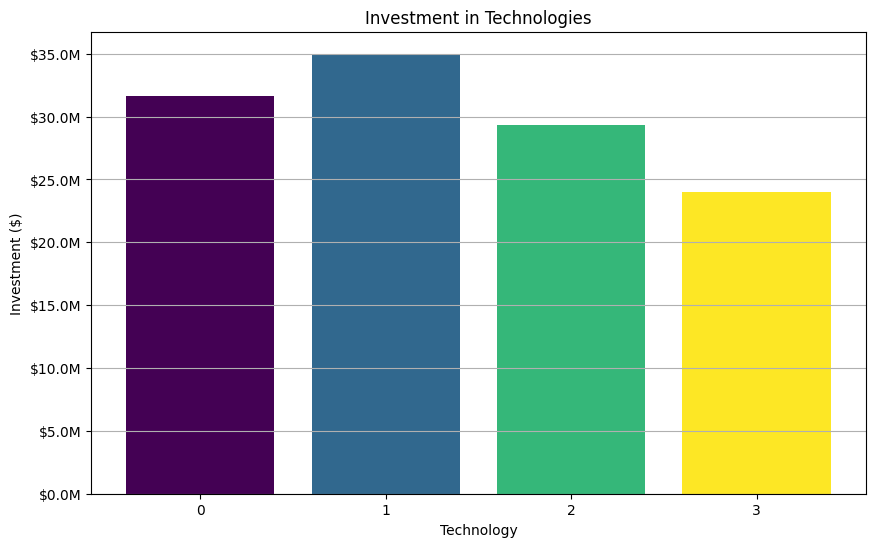

In [5]:
pl.plot_result(x,c,n)

### Perfect Information

In [6]:
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
c = [10.,7.,16.,6.]  #costs for instalation
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(3-i)+(([0]*i+[1]+[0]*(3-i))*3) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(4+4*i)+[-1]*4+[0]*(len(c)-8-4*i) for i in range(k)]

costs = []
for a in range(len(demands)):
    #costs = costs+[linprog(c=c, A_ub = Aub, b_ub = bub+(demands[a])).fun*probs[a]]
    #print(sum(costs))  
    x=cp.Variable(len(c))
    Aub = np.array(Aub)
    c= np.array(c)
    b_ub_temp = np.array(bub+demands[a])
    restricts=[Aub @ x <= b_ub_temp]+ [x >= 0]
    problem = cp.Problem(cp.Minimize(c.T @x),restricts )

    costs=costs+[problem.solve(solver = cp.GUROBI)*probs[a]]
print(f"Total costs: {sum(costs)}")

Total costs: 394.9666666666667


## Part 2

[0, 1, 2, 3]
4054
-var81993[4049 4050 4051 4052 4053] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var81993[3] @ 0.9756128078490386 + -var81993[4042 4047 4052] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Set parameter TimeLimit to value 100
Objective value: 409.3384960094348
Capacity of each technology: [6.45801255 4.36417218 0.         1.64722265]
Maximum capacity: 10.950771690537541
Investment costs for phase 1: 105.01266668342114
Production costs for phase 2: 304.3258293260118


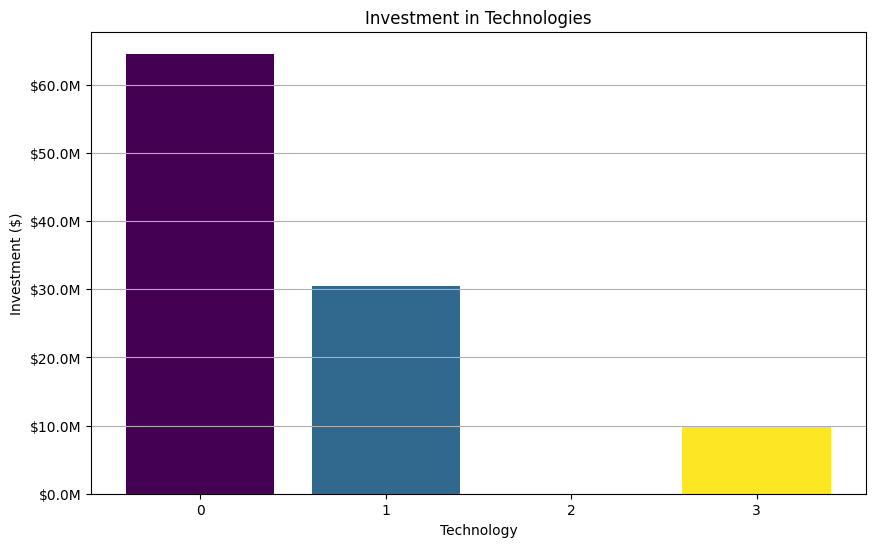

Time taken in seconds 2.2695629596710205


In [13]:
nreal = 10
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

In [8]:
nreal = 35
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
14179
-var41448[14174 14175 14176 14177 14178] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var41448[3] @ param41447[139] + -var41448[14167 14172 14177] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Set parameter TimeLimit to value 100
Objective value: 411.04287217223276
Capacity of each technology: [4.58368436 6.58191669 0.         1.46836761]
Maximum capacity: 10.859216880070424
Investment costs for phase 1: 100.72046602770718
Production costs for phase 2: 310.32240614452564
Time taken in seconds 164.75202012062073


In [9]:
rndvl= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
pl.print_solution(x,cset)
pl.plot_result(x,cset,n)

Objective value: 410.57760631720333
Capacity of each technology: [5.72657955 5.31719725 0.         1.57816747]
Maximum capacity: 10.98584687348638
Investment costs for phase 1: 103.95518114072931
Production costs for phase 2: 306.62242517647434


In [10]:
params =[]
values = []
for o in tqdm(range(150)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [01:35<00:00,  1.58it/s]


[np.float64(409.2336921573066), np.float64(410.48699855144616), np.float64(410.2195825011553), np.float64(410.08318304795233), np.float64(410.46897492692415), np.float64(409.8198246808829), np.float64(409.8771890682536), np.float64(411.37062824837597), np.float64(410.8521933083093), np.float64(412.02823847527344), np.float64(410.54146930644686), np.float64(410.2166534348567), np.float64(410.4778441994721), np.float64(410.03330616008503), np.float64(413.211094507047), np.float64(410.36169699531945), np.float64(411.2800518237773), np.float64(412.07784536841746), np.float64(410.98999556336685), np.float64(410.99078248304426), np.float64(411.5372298140666), np.float64(410.3775150061309), np.float64(408.78336317018795), np.float64(409.1918599967394), np.float64(411.2841454058666), np.float64(410.65162777052274), np.float64(410.05428445583294), np.float64(409.95074321091573), np.float64(411.7059338680474), np.float64(411.0282084473224), np.float64(410.40492748075457), np.float64(412.49629052

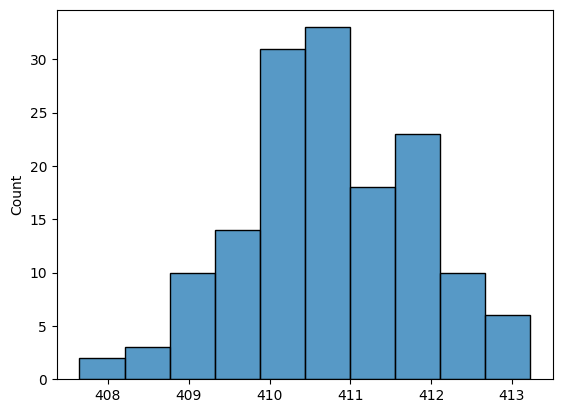

In [11]:
import seaborn
import pandas
print(values)
print(params)
seaborn.histplot(values)
paramar = pandas.DataFrame(params,columns=["one","two","three","four"] )
print(max(paramar["three"]))

In [12]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/cases for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = costsvec*cases

rqual= np.random.uniform(size=cases*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
rqual = cp.Parameter(shape=cases*4 ,value=[rqual[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)])

#randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)]
x=cp.Variable(len(cset) )
capacities= cp.Parameter(shape=4, value=[10]*4)

#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5]@multidin2<= demands[(k//3)%27][k%3] for k in range(cases*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([0,5,10]) 
multiding = np.array([1,1,1])
constr = constr + [capacities[k]*rqual[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*cases) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
405
-var190805[400 401 402 403 404] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= param190806[3] @ param190804[3] + -var190805[393 398 403] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Set parameter TimeLimit to value 100
Objective value: 228.68468457110026
Capacity of each technology: [0. 0. 3. 0.]
Maximum capacity: 2.4000000000000004
Investment costs for phase 1: 2.592
Production costs for phase 2: 226.09268457110016
Time taken in seconds 0.2414703369140625


/home/esteban/rug/optimization_under_uncertainty/assignment/venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:237: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


In [12]:
ntests=50
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
valuevector = []
for Val in tqdm(range(len(params))):
    capacities.value = params[Val]
    curval =params[Val]@[10.,7.,16.,6.]
    for t in rndvl:
        rqual.value = t
        lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
        curval = curval +lilproblem.value/ntests
    valuevector = valuevector +[curval]

[[np.float64(0.8864959921783606), np.float64(0.7064868412183426), np.float64(0.5833550909636405), np.float64(0.9321639577831596)], [np.float64(0.7580177611557775), np.float64(0.7554463446121865), np.float64(0.6644024970835898), np.float64(0.9237141176078991)], [np.float64(0.6870893087336455), np.float64(0.7760038342118913), np.float64(0.7821105661630721), np.float64(0.9445880124643431)], [np.float64(0.6232922325026949), np.float64(0.7654740551172956), np.float64(0.5694995164500926), np.float64(0.959663981545275)], [np.float64(0.7035820083282467), np.float64(0.7869784317726325), np.float64(0.5000094285103709), np.float64(0.9335536502484144)], [np.float64(0.6642081890606882), np.float64(0.742413194212528), np.float64(0.7748422442630063), np.float64(0.9690481878979451)], [np.float64(0.6579539011666996), np.float64(0.7866151647164333), np.float64(0.5213731514566181), np.float64(0.9878426758213725)], [np.float64(0.634524564001577), np.float64(0.745159461213337), np.float64(0.787582119942678

 91%|█████████ | 136/150 [30:00<14:03, 60.25s/it]

In [ ]:
seaborn.histplot(valuevector)

print(params[ valuevector.index(min(valuevector))])
optipars = params[ valuevector.index(min(valuevector))]
print(min(valuevector))
print(sum( [params[ valuevector.index(min(valuevector))][k]*[10.,7.,16.,6.][k] for k in range(4)]))

In [ ]:
paramar.to_csv("BackupStorage-paramtests")
pandas.DataFrame(valuevector).to_csv("BackupStorage-results")
pandas.DataFrame(values).to_csv("BackupStorage-initialoutcomes")



In [ ]:
import pandas
paramar = pandas.read_csv("BackupStorage-paramtests")
paramar = paramar[["one", "two", "three", "four"]]
params = paramar.values.tolist()
valuevector = pandas.read_csv("BackupStorage-results")
valuevector = valuevector["0"].to_list()
values  =pandas.read_csv("BackupStorage-initialoutcomes")
values = values["0"].to_list()
t=[0,0,2]

### Expected Value Problem

In [ ]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= [0.5]*4
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

avph11= x.value[0:4]

In [ ]:
ntests=1000
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
Vtestvec = []
#curval =sum([optipars[i]*[10.,7.,16.,6.][i] for i in range(4)]) 
curval =avph11@[10.,7.,16.,6.]
print(curval)
q = 0
for t in rndvl:
    print(q)
    rqual.value = t
    lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
    Vtestvec =Vtestvec+[curval +lilproblem.value] 
    q=q+1
print(np.mean(Vtestvec))
print(np.sqrt(np.var(Vtestvec)))

In [ ]:
import scipy
import scipy.spatial
Tree = scipy.spatial.KDTree(params)
print(Tree.query(avph11))
print(params[Tree.query(avph11)[1]] )
print(valuevector[Tree.query(avph11)[1]])
min(valuevector)
print(avph11)
for k in paramar.columns:
    print(k)
    print(np.mean(paramar[k]))
    print(np.var(paramar[k]))

### Perfect Information

In [ ]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [ ]:
params =[]
values = []
for o in tqdm(range(4000)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

In [ ]:
np.mean(values)

In [ ]:
seaborn.histplot(values)